# ANALISI ISTAT MICRODATI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

### VARIABILI D'INTERESSE
2019:
- REG: regione di residenza
- EDULEV: livello istruzione
- CLETAS: classe d'età
- C59AB: lavoro trovato con centro impiego
- C59: come è stato trovato il lavoro
- C73: soddisfazione lavorativa 
- SG11: sesso (1: maschio, 2: femmina)
- COND3: condizione lavorativa 3 modalità
- COND10: condizione lavorativa 10 modalità
- COEFF_MIGL: coefficiente riporto migliaia

2021:
- REGMCR: regione di residenza
- EDULEV: livello istruzione
- CLETAS: classe d'età
- QC62: come è stato trovato il lavoro
- QC67: soddisf
- QSF11: sesso
- COND3: condizione lavorativa 3 modalità
- COND10: condizione lavorativa 10 modalità
- COEFF_MIGL: coefficiente riporto migliaia

In [3]:
trim2019=pd.read_csv("C:/Users/gugli/Desktop/Università/Lab ISTAT/2019/MICRODATI/RCFL_Microdati_2019_Quarto_trimestre.txt", sep="\t")

In [4]:
trim2019

,ANNO,TRIM,REG,WAVQUA,GRACOM,SG4,SG11,SG13,SG16,SG18B,...,TN2M,TISTUD,EDULEV,COISTR,EDUCST,COURAT,PROVCM,TICONT,MOTIPT,COEFMI
0,2019,4,19,2,,1,2,1,1,,...,0,10,6,,2,2,283,,,2506
1,2019,4,7,1,,2,2,1,1,,...,2,05,5,,2,2,11,,,2814
2,2019,4,7,1,,2,1,1,1,,...,2,03,3,,2,2,11,,,2814
3,2019,4,4,3,,2,1,1,1,,...,2,04,4,,2,2,21,,,944
4,2019,4,4,3,,2,2,1,1,,...,2,04,4,,2,2,21,,,944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94116,2019,4,10,4,,2,1,1,1,,...,2,05,5,,2,2,54,,,2306
94117,2019,4,10,4,,2,2,1,1,,...,2,02,2,,2,2,54,,,2306
94118,2019,4,12,3,058091,3,1,1,1,,...,1,10,6,,2,2,258,,,34050
94119,2019,4,12,3,058091,3,2,1,1,,...,1,10,6,,2,2,258,,,34050


In [5]:
regioni={
    9: "Toscana",
    10: "Umbria",
    11: "Marche",
    12: "Lazio"
}

In [6]:
#SUBSETTING 2019

trim2019["COEFF"]=trim2019.COEFMI
trim2019=trim2019[["REG", "EDULEV", "CLETAS", "C59AB", "C59", "C73", "SG11", "COND3", "COND10", "COEFF"]]
trim2019=trim2019[(trim2019.REG>=9) & (trim2019.REG<=12)]

In [7]:
#RIMUOVO LE PERSONE CHE NON LAVORANO
trim2019_lav=trim2019[((trim2019.C59AB!="   ")|(trim2019.C59!="   "))]

In [8]:
test=defaultdict(lambda:0)
for i in trim2019.COND3:
    test[i]+=1
test

defaultdict(<function __main__.<lambda>()>, {3: 8188, 1: 5207, 2: 479})

In [9]:
trim2019_lav[((trim2019_lav.C59!="   ")|(trim2019_lav.C59AB!="   "))]

,REG,EDULEV,CLETAS,C59AB,C59,C73,SG11,COND3,COND10,COEFF
53,11,6,10,004,002,007,2,1,1,3233
93,9,5,12,005,002,008,2,1,1,22498
96,9,6,10,002,002,009,1,1,1,8274
97,9,6,9,001,002,000,2,1,1,8274
98,12,5,12,005,002,009,1,1,1,16936
...,...,...,...,...,...,...,...,...,...,...
94079,9,6,10,002,002,010,2,1,1,32357
94106,12,5,11,011,002,006,1,1,1,16975
94107,12,5,11,011,002,004,2,1,1,16975
94118,12,6,9,002,002,006,1,1,1,34050


In [10]:
trim2019_lav[trim2019_lav.C59AB=="010"]

,REG,EDULEV,CLETAS,C59AB,C59,C73,SG11,COND3,COND10,COEFF
389,11,3,10,010,,010,2,1,1,1995
547,11,5,10,010,,006,1,1,1,4226
624,9,3,14,010,,000,2,1,1,6801
745,9,2,17,010,,002,1,1,1,6008
773,10,6,11,010,,010,2,1,1,2532
...,...,...,...,...,...,...,...,...,...,...
93426,11,5,10,010,,007,1,1,1,4245
93492,9,3,9,010,,010,1,1,1,16308
93557,9,6,11,010,,008,1,1,1,23420
93558,9,5,10,010,,010,2,1,1,23420


In [11]:
trim2019.head()

,REG,EDULEV,CLETAS,C59AB,C59,C73,SG11,COND3,COND10,COEFF
11,9,2,17,,,,2,3,10,9052
47,12,5,15,,,,1,3,10,3418
48,12,6,16,,,,2,3,10,3418
53,11,6,10,004,002,007,2,1,1,3233
93,9,5,12,005,002,008,2,1,1,22498


In [12]:
def soddisfazione(df, reg, anno):
    if anno==2019:
        a=df[(df.C73!="   ") & (df.REG==reg)]
        a=round(a.groupby(by=["C73"])["COEFF"].sum()/10000)
        sodd=zip(a.keys(), list(a))
        sodd=pd.DataFrame(sodd, columns=["Punteggio", "Totale"])
        sodd["Percentuale"]=(sodd["Totale"]/(sodd["Totale"].sum()))*100
        sodd=sodd.drop("Totale", 1)
        sodd=dict(sodd.values)
        return sodd
    
    elif anno==2021:
        a=df[(df.QC67!="   ") & (df.REGMCR==reg)]
        a=round(a.groupby(by=["QC67"])["COEFF"].sum()/10000)
        sodd=zip(a.keys(), list(a))
        sodd=pd.DataFrame(sodd, columns=["Punteggio", "Totale"])
        sodd["Percentuale"]=sodd.Totale/(sodd.Totale.sum())*100
        sodd=sodd.drop("Totale", 1)
        sodd=dict(sodd.values)
        return sodd

In [13]:
def lavoro(ds, reg, anno):
    if anno==2019:
        #lav_i -> lavoro centri impiego
        a=ds[(ds.REG==reg) & (ds.C59!="   ")]
        a=round(a.groupby(by=["C59"])["COEFF"].sum()/10000)
        lav_i=zip(a.keys(), list(a))
        lav_i=pd.DataFrame(lav_i, columns=["Mod", "Totale"])
        lav_i["Percentuale"]=lav_i.Totale/(lav_i.Totale.sum())*100
        lav_i=lav_i.drop("Totale", 1)
        lav_i=dict(lav_i.values)

        a=ds[(ds.REG==reg) & (ds.C59AB!="   ")]
        a=round(a.groupby(by=["C59AB"])["COEFF"].sum()/10000)
        lav=zip(a.keys(), list(a))
        lav=pd.DataFrame(lav, columns=["Mod", "Totale"])
        lav["Percentuale"]=lav.Totale/(lav.Totale.sum())*100
        lav=lav.drop("Totale", 1)
        lav=dict(lav.values)
        return lav, lav_i
    
    else:
        a=ds[(ds.REGMCR==reg) & (ds.QC62!="   ")]
        a=round(a.groupby(by=["QC62"])["COEFF"].sum()/10000)
        lav=zip(a.keys(), list(a))
        lav=pd.DataFrame(lav, columns=["Mod", "Totale"])
        lav["Percentuale"]=lav.Totale/(lav.Totale.sum())*100
        lav=lav.drop("Totale", 1)
        lav=dict(lav.values)
        return lav

In [14]:
lav_tosc_2019, imp_t=lavoro (trim2019, 9,2019)
lav_marche_2019, imp_m=lavoro (trim2019, 11,2019)
lav_umbria_2019, imp_u=lavoro (trim2019, 10,2019)
lav_lazio_2019, imp_l=lavoro (trim2019, 12,2019)

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav_i=lav_i.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav_i=lav_i.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:9: FutureWarning: In a futur

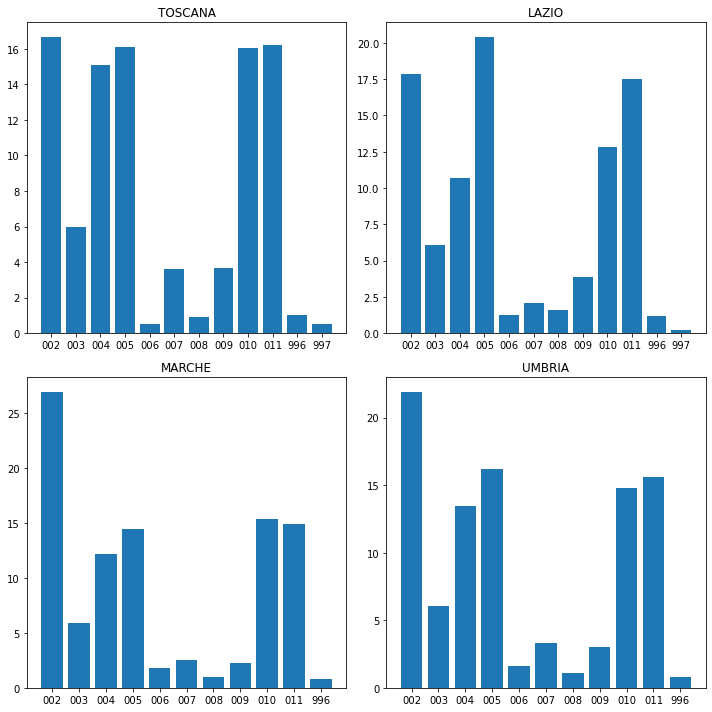

In [15]:
#OUTPUT NASCOSTO

fig, ax= plt.subplots(figsize=(10,10),nrows=2, ncols=2)

#Toscana
ax[0,0].bar(list(lav_tosc_2019.keys())[1::], list(lav_tosc_2019.values())[1::])
ax[0,0].set_title("TOSCANA")

#Lazio
ax[0,1].bar(list(lav_lazio_2019.keys())[1::], list(lav_lazio_2019.values())[1::])
ax[0,1].set_title("LAZIO")
#Marche
ax[1,0].bar(list(lav_marche_2019.keys())[1::], list(lav_marche_2019.values())[1::])
ax[1,0].set_title("MARCHE")
#Umbria
ax[1,1].bar(list(lav_umbria_2019.keys())[1::], list(lav_umbria_2019.values())[1::])
ax[1,1].set_title("UMBRIA")

plt.tight_layout()
plt.show()

## ANALISI 2021

In [16]:
trim2021=pd.read_csv("C:/Users/gugli/Desktop/Università/Lab ISTAT/2021/MICRODATI/RCFL_Microdati_2021_Quarto_trimestre.txt", sep="\t")

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\16822747.py:1: DtypeWarning: Columns (179,180,181,223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  trim2021=pd.read_csv("C:/Users/gugli/Desktop/Università/Lab ISTAT/2021/MICRODATI/RCFL_Microdati_2021_Quarto_trimestre.txt", sep="\t")


In [17]:
trim2021

,ANNO,TRIM,WAVQUA,QSF11,QSF17,QSF20,QSF26,QSF30,QSF32,QB01,...,QF06MCR,QH04MCR,QH33MCR,QSF04MCR,QSF24MCR,QSF27MCR,TFMCR,MCRFAM,MCRIND,AMATRIMCR
0,2021,4,3,2,2,2,1,003,,1,...,,6,,2,3,,3,52481,121472,
1,2021,4,3,1,1,1,1,,,1,...,,5,,2,,,3,52481,94964,
2,2021,4,4,1,2,2,1,002,,1,...,,4,,4,3,,4,57576,121751,1
3,2021,4,4,2,1,1,1,,,2,...,1,4,,4,,,4,57576,8527,1
4,2021,4,4,1,1,1,1,,,,...,,,,4,,,4,57576,74376,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129308,2021,4,1,2,1,1,1,,,2,...,,,,1,,,2,23003,86125,
129309,2021,4,2,1,1,2,1,002,,2,...,,6,,2,4,,3,50599,44347,3
129310,2021,4,2,2,1,1,1,,,2,...,,6,,2,,,3,50599,74039,3
129311,2021,4,1,2,1,1,1,,,1,...,,1,,1,,,2,55987,63530,


In [18]:
trim2021["COEFF"]=trim2021.COEF_CCP
trim2021=trim2021[["REGMCR", "EDULEV", "CLETAS", "QC67", "QC62", "QSF11", "COND3", "COND10", "COEFF"]]
trim2021=trim2021[(trim2021.REGMCR>=9) & (trim2021.REGMCR<=12)]

In [19]:
trim2021.head()

,REGMCR,EDULEV,CLETAS,QC67,QC62,QSF11,COND3,COND10,COEFF
25800,11,3,14,,,2,3,5,2613
25801,11,3,17,,,1,3,10,2815
25802,11,5,15,,,2,3,10,2815
25803,11,6,17,,,1,3,10,2393
25804,11,5,15,,,2,3,10,2393


In [20]:
trim2019[trim2019.C59AB=="997"]

,REG,EDULEV,CLETAS,C59AB,C59,C73,SG11,COND3,COND10,COEFF
5582,9,3,8,997,002,005,1,1,1,16608
11806,12,5,6,997,002,007,1,1,1,19740
11931,9,5,13,997,,008,2,1,1,3997
22399,9,6,12,997,002,008,1,1,1,5912
39017,9,5,13,997,002,007,1,1,1,14636
58195,12,3,11,997,002,006,2,1,1,3879
61733,12,5,9,997,002,010,2,1,1,23525
80934,9,6,15,997,,010,1,1,1,13307
83906,9,3,12,997,002,997,2,1,1,15569
89094,9,5,7,997,002,006,1,1,1,11752


In [21]:
regioni

{9: 'Toscana', 10: 'Umbria', 11: 'Marche', 12: 'Lazio'}

In [22]:
lav_tosc_2021=lavoro (trim2021, 9,2021)
lav_marche_2021=lavoro (trim2021, 11,2021)
lav_umbria_2021=lavoro (trim2021, 10,2021)
lav_lazio_2021=lavoro (trim2021, 12,2021)

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\4159743413.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lav=lav.drop("Totale", 1)


In [23]:
list_2021_l=[lav_tosc_2021,lav_umbria_2021 , lav_marche_2021, lav_lazio_2021]
list_2019_l=[lav_tosc_2019, lav_umbria_2019, lav_marche_2019, lav_lazio_2019]

In [24]:
list_2019_l[1]["997"]=0
list_2019_l[2]["997"]=0 #come è stato trovato il lavoro 2021

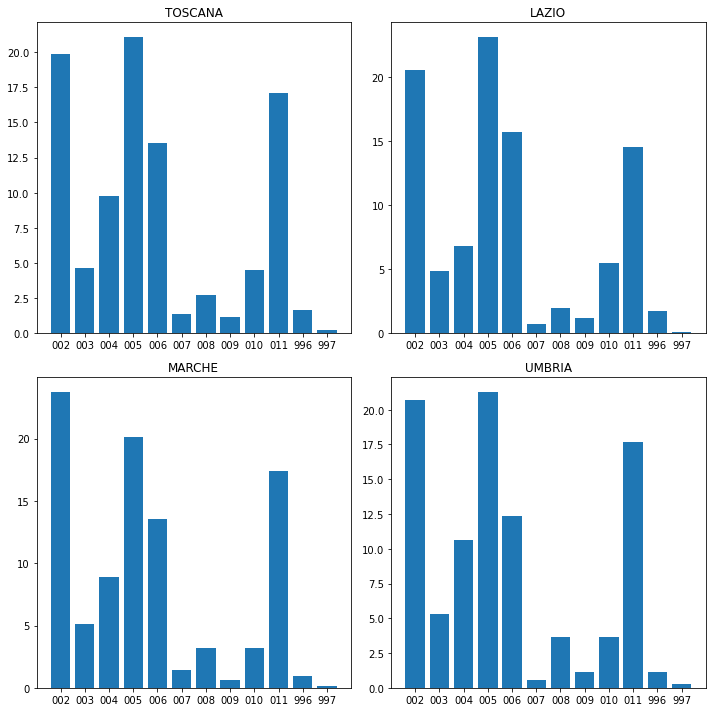

In [25]:
fig, ax= plt.subplots(figsize=(10,10),nrows=2, ncols=2)

#Toscana
ax[0,0].bar(list(lav_tosc_2021.keys())[1::], list(lav_tosc_2021.values())[1::])
ax[0,0].set_title("TOSCANA")

#Lazio
ax[0,1].bar(list(lav_lazio_2021.keys())[1::], list(lav_lazio_2021.values())[1::])
ax[0,1].set_title("LAZIO")
#Marche
ax[1,0].bar(list(lav_marche_2021.keys())[1::], list(lav_marche_2021.values())[1::])
ax[1,0].set_title("MARCHE")
#Umbria
ax[1,1].bar(list(lav_umbria_2021.keys())[1::], list(lav_umbria_2021.values())[1::])
ax[1,1].set_title("UMBRIA")

plt.tight_layout()
plt.show()

In [26]:
def charts(l_2019, l_2021):
    fig, ax= plt.subplots(figsize=(15,20),nrows=4, ncols=2, sharey=True)
    for j,i in enumerate(range(9,9+len(l_2019))):
        ax[j,0].grid()
        ax[j,1].grid()
        ax[j,0].bar(l_2019[j].keys(), l_2019[j].values(), color="maroon")
        ax[j,0].set_title(regioni[i]+" 2019", fontsize=14)
        ax[j,1].bar(l_2021[j].keys(), l_2021[j].values(), color="red")
        ax[j,1].set_title(regioni[i]+" 2021", fontsize=14)
        ax[j,0].set_facecolor("gainsboro")
        ax[j,1].set_facecolor("gainsboro")

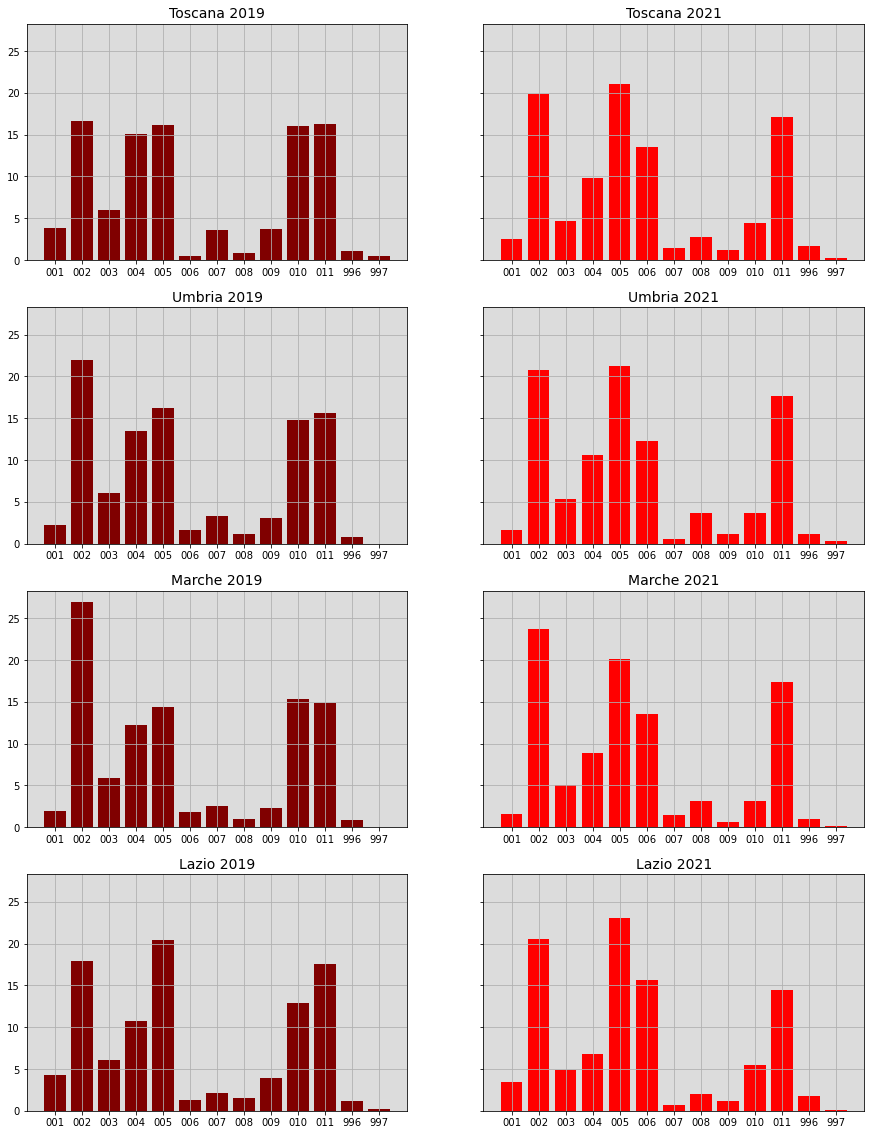

In [27]:
charts(list_2019_l,list_2021_l)

In [28]:
len(list_2019_l[0].keys())

13

In [29]:
mod_lav=["Annunci", "Rivolto al datore", "Contattato dal datore", "Parenti, familiari", "Amici, conoscenti", "Concorso pubblico", "Agenzia intermediazione", "Struttura intermediazione pubblica", "Segnalazione Scuola", "Precedenti esperienze", "Att. autonoma", "Altro", "Non sa"]
len(mod_lav)

13

In [30]:
list_2019_l

[{'001': 3.799873337555415,
  '002': 16.656111462951234,
  '003': 5.953134895503483,
  '004': 15.072830905636478,
  '005': 16.086130462317925,
  '006': 0.506649778340722,
  '007': 3.609879670677644,
  '008': 0.8866371120962635,
  '009': 3.6732108929702343,
  '010': 16.022799240025332,
  '011': 16.212792906903104,
  '996': 1.013299556681444,
  '997': 0.506649778340722},
 {'001': 2.191780821917808,
  '002': 21.91780821917808,
  '003': 6.027397260273973,
  '004': 13.424657534246576,
  '005': 16.164383561643834,
  '006': 1.643835616438356,
  '007': 3.287671232876712,
  '008': 1.095890410958904,
  '009': 3.0136986301369864,
  '010': 14.794520547945206,
  '011': 15.616438356164384,
  '996': 0.821917808219178,
  '997': 0},
 {'001': 1.9230769230769231,
  '002': 26.923076923076923,
  '003': 5.929487179487179,
  '004': 12.179487179487179,
  '005': 14.423076923076922,
  '006': 1.7628205128205128,
  '007': 2.564102564102564,
  '008': 0.9615384615384616,
  '009': 2.2435897435897436,
  '010': 15.384

In [154]:
l

[[3.799873337555415,
  16.656111462951234,
  5.953134895503483,
  15.072830905636478,
  16.212792906903104,
  16.086130462317925,
  0.506649778340722,
  3.609879670677644,
  0.8866371120962635,
  3.6732108929702343,
  16.022799240025332,
  1.013299556681444,
  0.506649778340722],
 [2.191780821917808,
  21.91780821917808,
  6.027397260273973,
  13.424657534246576,
  15.616438356164384,
  16.164383561643834,
  1.643835616438356,
  3.287671232876712,
  1.095890410958904,
  3.0136986301369864,
  14.794520547945206,
  0.821917808219178,
  0],
 [1.9230769230769231,
  26.923076923076923,
  5.929487179487179,
  12.179487179487179,
  14.903846153846153,
  14.423076923076922,
  1.7628205128205128,
  2.564102564102564,
  0.9615384615384616,
  2.2435897435897436,
  15.384615384615385,
  0.8012820512820512,
  0],
 [4.327335047129392,
  17.866323907455012,
  6.083976006855185,
  10.711225364181661,
  17.5235646958012,
  20.394173093401886,
  1.2853470437017995,
  2.0994001713796058,
  1.585261353898

In [31]:
new=[]
for i, j in enumerate(list_2019_l):
    mom=list_2019_l[i]
    for elem in mom.values():
        new.append(elem)

In [32]:
l19_l=[]
mom=[]
k=1
for i,j in enumerate(new):
    i+=1
    if i%13!=0:
        mom.append(j)
    else:
        mom.append(j)
        l19_l.append(mom)
        mom=[]

In [33]:
new[12]

0.506649778340722

In [34]:
len(l19_l[0])

13

In [35]:
l=[]
mom=[]
for k in l19_l:
    precedente_elemento = k[10]
    for i, j in enumerate(k):
        if 3<i<11:
            mom.append(precedente_elemento)
            precedente_elemento = j
        else:
            mom.append(j)
    l.append(mom)
    mom=[]

In [36]:
l

[[3.799873337555415,
  16.656111462951234,
  5.953134895503483,
  15.072830905636478,
  16.212792906903104,
  16.086130462317925,
  0.506649778340722,
  3.609879670677644,
  0.8866371120962635,
  3.6732108929702343,
  16.022799240025332,
  1.013299556681444,
  0.506649778340722],
 [2.191780821917808,
  21.91780821917808,
  6.027397260273973,
  13.424657534246576,
  15.616438356164384,
  16.164383561643834,
  1.643835616438356,
  3.287671232876712,
  1.095890410958904,
  3.0136986301369864,
  14.794520547945206,
  0.821917808219178,
  0],
 [1.9230769230769231,
  26.923076923076923,
  5.929487179487179,
  12.179487179487179,
  14.903846153846153,
  14.423076923076922,
  1.7628205128205128,
  2.564102564102564,
  0.9615384615384616,
  2.2435897435897436,
  15.384615384615385,
  0.8012820512820512,
  0],
 [4.327335047129392,
  17.866323907455012,
  6.083976006855185,
  10.711225364181661,
  17.5235646958012,
  20.394173093401886,
  1.2853470437017995,
  2.0994001713796058,
  1.585261353898

In [37]:
l_av19=[]
av=0
for i in range (13):
    for j in range(4):
        av+=l[j][i]
    av=av/4
    l_av19.append(av)
    av=0
l_av19

[3.0605165324198844,
 20.84083012816531,
 5.998498835529955,
 12.847050245887974,
 16.06416052817871,
 16.76694101011014,
 1.2996632378253477,
 2.8902634097591315,
 1.1323318346231288,
 3.207346324814772,
 14.76385140240098,
 0.9483279388785733,
 0.18021857140608882]

In [38]:
list_2021_l

[{'001': 2.4528301886792456,
  '002': 19.87421383647799,
  '003': 4.654088050314465,
  '004': 9.748427672955975,
  '005': 21.069182389937108,
  '006': 13.522012578616351,
  '007': 1.3836477987421385,
  '008': 2.7044025157232707,
  '009': 1.1320754716981132,
  '010': 4.465408805031446,
  '011': 17.10691823899371,
  '996': 1.6352201257861636,
  '997': 0.25157232704402516},
 {'001': 1.680672268907563,
  '002': 20.72829131652661,
  '003': 5.322128851540616,
  '004': 10.644257703081232,
  '005': 21.288515406162464,
  '006': 12.324929971988796,
  '007': 0.5602240896358543,
  '008': 3.6414565826330536,
  '009': 1.1204481792717087,
  '010': 3.6414565826330536,
  '011': 17.647058823529413,
  '996': 1.1204481792717087,
  '997': 0.2801120448179272},
 {'001': 1.5948963317384368,
  '002': 23.76395534290271,
  '003': 5.103668261562999,
  '004': 8.931419457735247,
  '005': 20.095693779904305,
  '006': 13.556618819776714,
  '007': 1.4354066985645932,
  '008': 3.1897926634768736,
  '009': 0.63795853269

In [41]:
l21_tidy=[]
lista_1 = l21[:13]
lista_2 = l21[13:26]
lista_3 = l21[26:39]
lista_4 = l21[39:]
l21_tidy.append(lista_1)
l21_tidy.append(lista_2)
l21_tidy.append(lista_3)
l21_tidy.append(lista_4)
l21_tidy

[[2.4528301886792456,
  19.87421383647799,
  4.654088050314465,
  9.748427672955975,
  21.069182389937108,
  13.522012578616351,
  1.3836477987421385,
  2.7044025157232707,
  1.1320754716981132,
  4.465408805031446,
  17.10691823899371,
  1.6352201257861636,
  0.25157232704402516],
 [1.680672268907563,
  20.72829131652661,
  5.322128851540616,
  10.644257703081232,
  21.288515406162464,
  12.324929971988796,
  0.5602240896358543,
  3.6414565826330536,
  1.1204481792717087,
  3.6414565826330536,
  17.647058823529413,
  1.1204481792717087,
  0.2801120448179272],
 [1.5948963317384368,
  23.76395534290271,
  5.103668261562999,
  8.931419457735247,
  20.095693779904305,
  13.556618819776714,
  1.4354066985645932,
  3.1897926634768736,
  0.6379585326953748,
  3.1897926634768736,
  17.384370015948964,
  0.9569377990430622,
  0.1594896331738437],
 [3.4512510785159622,
  20.491803278688526,
  4.831751509922347,
  6.816220880069025,
  23.080241587575497,
  15.703192407247627,
  0.690250215703192

In [42]:
l_av21=[]
av=0
for i in range (13):
    for j in range(4):
        av+=l21_tidy[j][i]
    av=av/4
    l_av21.append(av)
    av=0
l_av21

[2.294912466960302,
 21.21456594364896,
 4.977909168335106,
 9.03508142846037,
 21.383408290894845,
 13.776688444407373,
 1.0173822006614448,
 2.8800302829949693,
 1.0138198556660836,
 4.1830946249510035,
 16.65840040205978,
 1.3703430704600912,
 0.19436382049967377]

In [43]:
for i in range(4):
    print(pd.Series(list_2019_l[i].values()).sum())

100.0
100.0
99.99999999999999
100.0


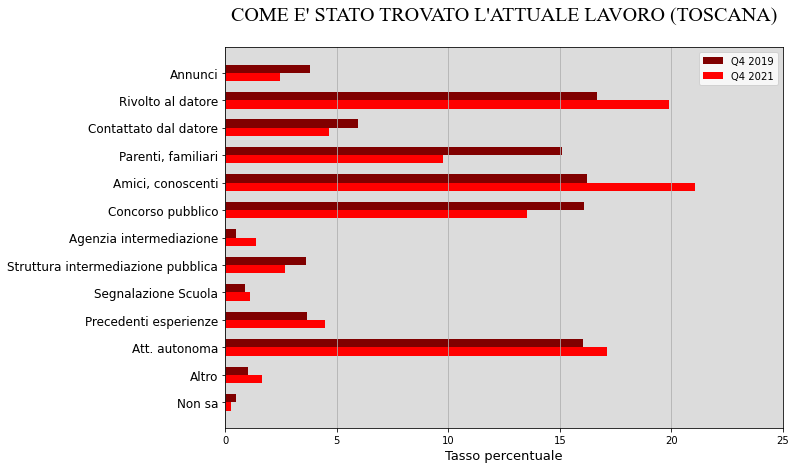

In [44]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=13
width=0.3
ind=np.arange(n)

plt.barh(ind+ width, l[0][::-1] , width, label='Q4 2019',color="maroon")
plt.barh(ind , list(list_2021_l[0].values())[::-1], width, label='Q4 2021',color="red")
plt.yticks(ind+.3/ 2, mod_lav[::-1], fontsize=12)

plt.legend()
plt.grid(axis="x")
plt.xlim([0,25])
ax.set_facecolor("gainsboro")
plt.xlabel("Tasso percentuale", fontsize=13)
plt.title("COME E' STATO TROVATO L'ATTUALE LAVORO (TOSCANA)\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [45]:
regioni

{9: 'Toscana', 10: 'Umbria', 11: 'Marche', 12: 'Lazio'}

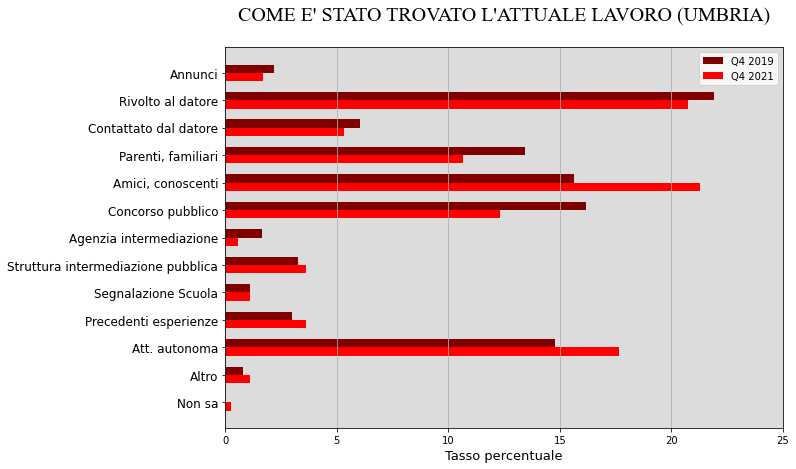

In [46]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=13
width=0.3
ind=np.arange(n)

plt.barh(ind+ width, l[1][::-1] , width, label='Q4 2019',color="maroon")
plt.barh(ind , list(list_2021_l[1].values())[::-1], width, label='Q4 2021',color="red")
plt.yticks(ind+.3/ 2, mod_lav[::-1], fontsize=12)


plt.legend()
plt.grid(axis="x")
plt.xlim([0,25])
ax.set_facecolor("gainsboro")
plt.xlabel("Tasso percentuale", fontsize=13)
plt.title("COME E' STATO TROVATO L'ATTUALE LAVORO (UMBRIA)\n", fontsize=20, fontname='Times New Roman')

plt.show()

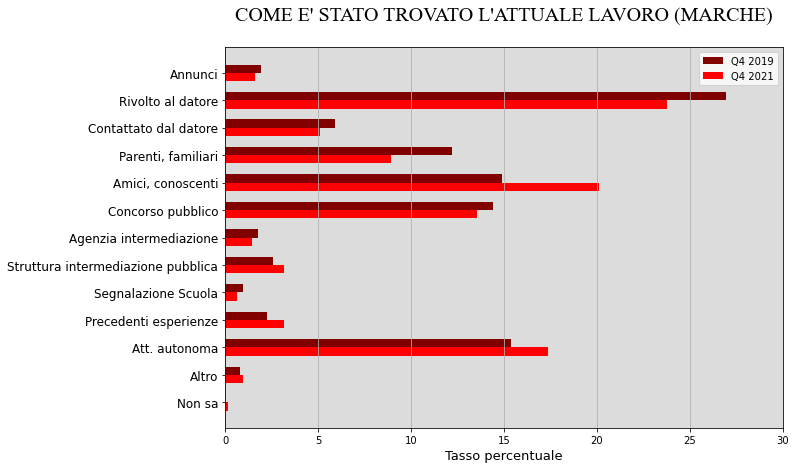

In [47]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=13
width=0.3
ind=np.arange(n)

plt.barh(ind+ width, l[2][::-1] , width, label='Q4 2019',color="maroon")
plt.barh(ind , list(list_2021_l[2].values())[::-1], width, label='Q4 2021',color="red")
plt.yticks(ind+.3/ 2, mod_lav[::-1], fontsize=12)

plt.legend()
plt.grid(axis="x")
plt.xlim([0,30])
ax.set_facecolor("gainsboro")
plt.xlabel("Tasso percentuale", fontsize=13)
plt.title("COME E' STATO TROVATO L'ATTUALE LAVORO (MARCHE)\n", fontsize=20, fontname='Times New Roman')

plt.show()

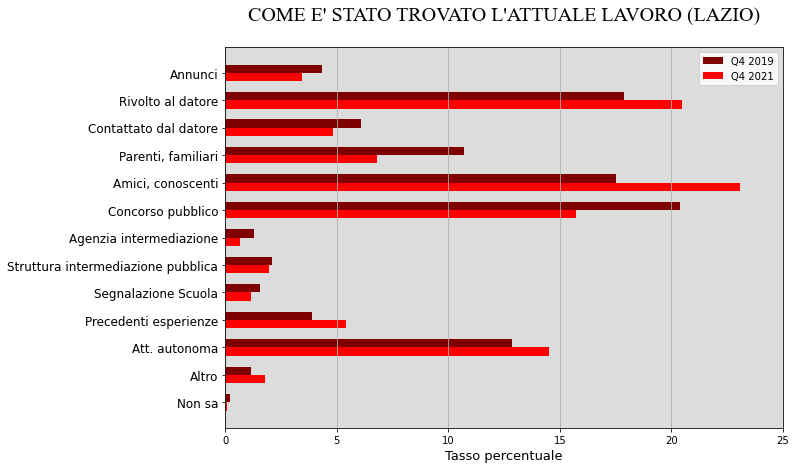

In [48]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=13
width=0.3
ind=np.arange(n)

plt.barh(ind+ width, l[3][::-1], width, label='Q4 2019',color="maroon")
plt.barh(ind, list(list_2021_l[3].values())[::-1], width, label='Q4 2021',color="red")

plt.yticks(ind+.3/2, mod_lav[::-1], fontsize=12)

plt.legend()
plt.grid(axis="x")
plt.xlim([0,25])
ax.set_facecolor("gainsboro")
plt.xlabel("Tasso percentuale", fontsize=13)
plt.title("COME E' STATO TROVATO L'ATTUALE LAVORO (LAZIO)\n", fontsize=20, fontname='Times New Roman')

plt.show()

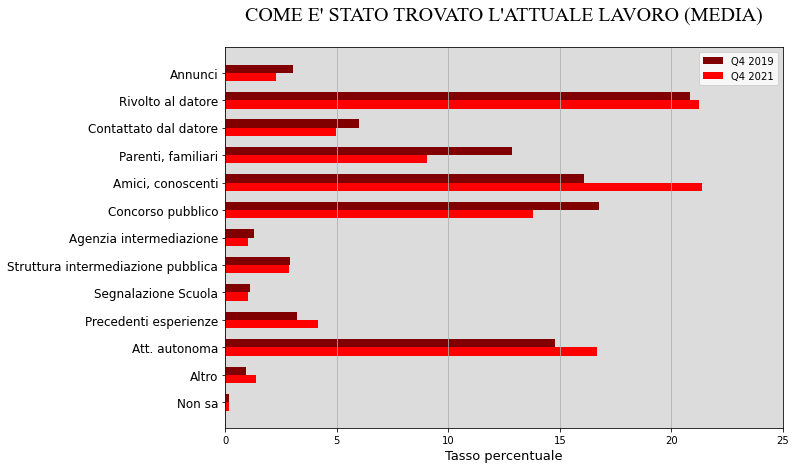

In [49]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=13
width=0.3
ind=np.arange(n)

plt.barh(ind+ width, l_av19[::-1], width, label='Q4 2019',color="maroon")
plt.barh(ind, l_av21[::-1], width, label='Q4 2021',color="red")

plt.yticks(ind+.3/2, mod_lav[::-1], fontsize=12)

plt.legend()
plt.grid(axis="x")
plt.xlim([0,25])
ax.set_facecolor("gainsboro")
plt.xlabel("Tasso percentuale", fontsize=13)
plt.title("COME E' STATO TROVATO L'ATTUALE LAVORO (MEDIA)\n", fontsize=20, fontname='Times New Roman')

plt.show()

## ANALISI DELLA SODDISFAZIONE DEL LAVORO

In [50]:
def soddisfazione(df, reg, anno):
    if anno==2019:
        a=df[(df.C73!="   ") & (df.REG==reg)]
        a=round(a.groupby(by=["C73"])["COEFF"].sum()/10000)
        sodd=zip(a.keys(), list(a))
        sodd=pd.DataFrame(sodd, columns=["Punteggio", "Totale"])
        sodd["Percentuale"]=(sodd["Totale"]/(sodd["Totale"].sum()))*100
        sodd=sodd.drop("Totale", 1)
        sodd=dict(sodd.values)
        
        return sodd
    
    elif anno==2021:
        a=df[(df.QC67!="   ") & (df.REGMCR==reg)]
        a=round(a.groupby(by=["QC67"])["COEFF"].sum()/10000)
        sodd=zip(a.keys(), list(a))
        sodd=pd.DataFrame(sodd, columns=["Punteggio", "Totale"])
        sodd["Percentuale"]=sodd.Totale/(sodd.Totale.sum())*100
        sodd=sodd.drop("Totale", 1)
        sodd=dict(sodd.values)
        
        return sodd

In [51]:
sod_tosc_2019=soddisfazione(trim2019,9,2019)
sod_umbria_2019=soddisfazione(trim2019,10,2019)
sod_marche_2019=soddisfazione(trim2019,11,2019)
sod_lazio_2019=soddisfazione(trim2019,12,2019)

sod_tosc_2021=soddisfazione(trim2021,9,2021)
sod_umbria_2021=soddisfazione(trim2021,10,2021)
sod_marche_2021=soddisfazione(trim2021,11,2021)
sod_lazio_2021=soddisfazione(trim2021,12,2021)

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2545391272.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2545391272.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2545391272.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2545391272.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Totale", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2545391272.py:19: FutureWarning: In a future

In [52]:
list_2019_s=[sod_tosc_2019,sod_umbria_2019,sod_marche_2019,sod_lazio_2019]
list_2021_s=[sod_tosc_2021,sod_umbria_2021,sod_marche_2021,sod_lazio_2021]

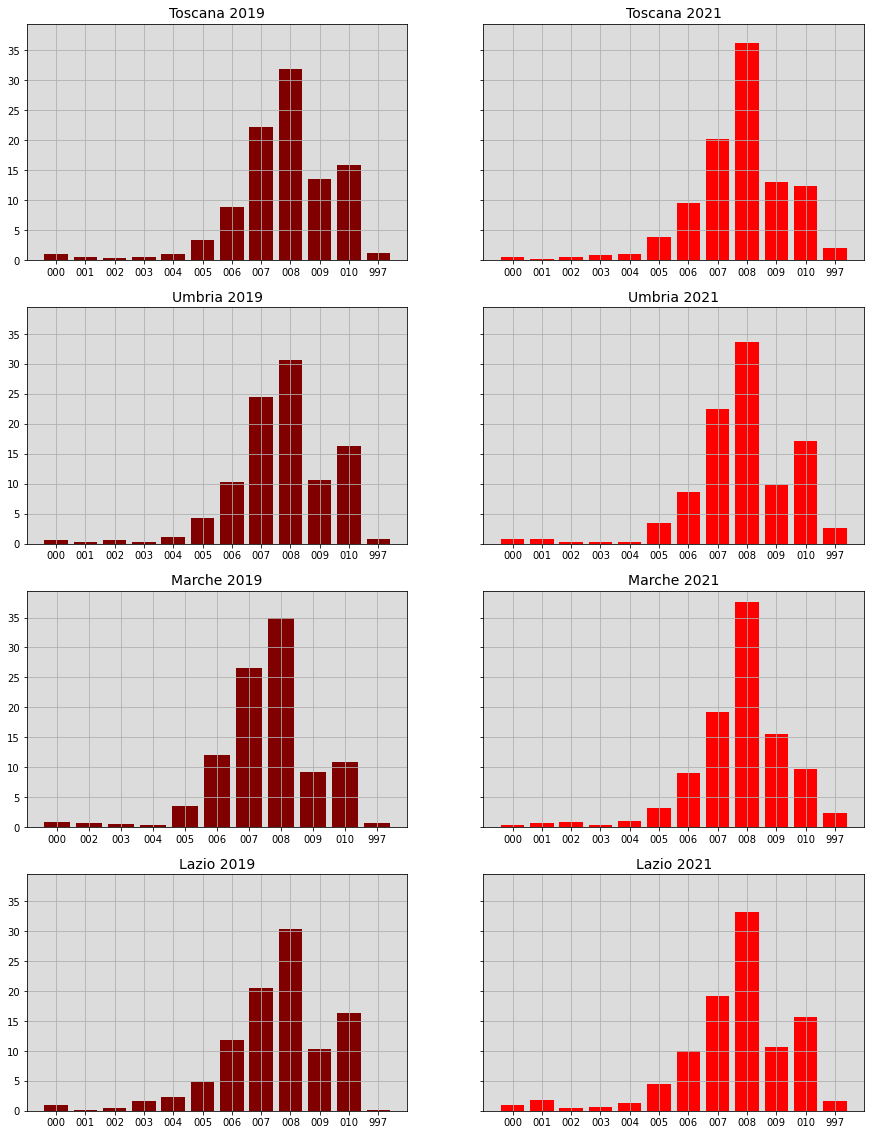

In [53]:
charts(list_2019_s, list_2021_s)

In [54]:
list_2019_s[0]

{'000': 1.0,
 '001': 0.5625,
 '002': 0.375,
 '003': 0.43750000000000006,
 '004': 0.9375,
 '005': 3.25,
 '006': 8.8125,
 '007': 22.25,
 '008': 31.8125,
 '009': 13.5,
 '010': 15.875,
 '997': 1.1875}

In [55]:
sod_lab=[i for i in range(0,11)]
sod_lab.append("Non sa")

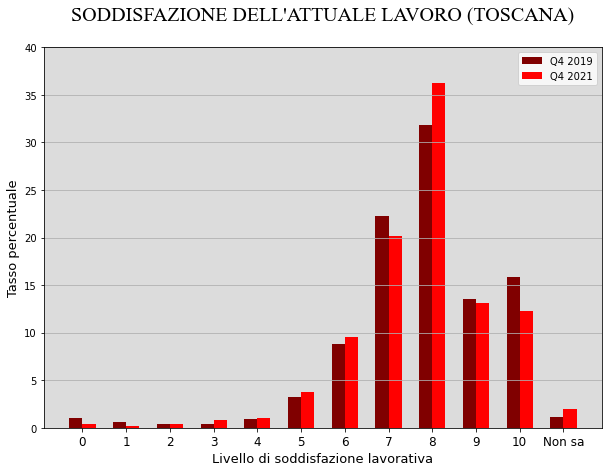

In [56]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=12
width=0.3
ind=np.arange(n)

plt.bar(ind, list_2019_s[0].values() , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, list_2021_s[0].values(), width, label='Q4 2021',color="red")
plt.xticks(ind+.3/ 2,sod_lab , fontsize=12)

plt.legend()
plt.grid(axis="y")
plt.ylim([0,40])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.xlabel("Livello di soddisfazione lavorativa", fontsize=13)
plt.title("SODDISFAZIONE DELL'ATTUALE LAVORO (TOSCANA)\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [57]:
regioni

{9: 'Toscana', 10: 'Umbria', 11: 'Marche', 12: 'Lazio'}

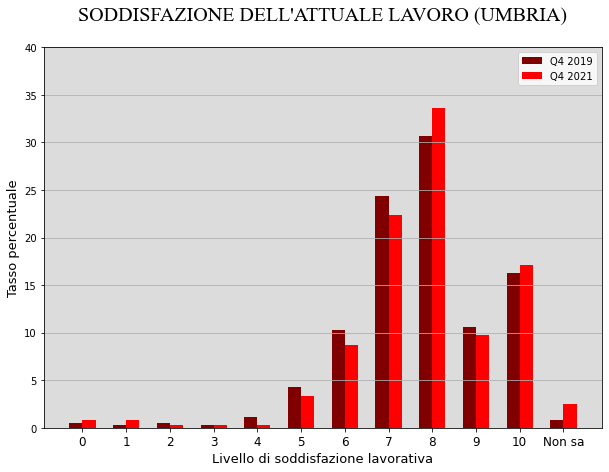

In [58]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=12
width=0.3
ind=np.arange(n)

plt.bar(ind, list_2019_s[1].values() , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, list_2021_s[1].values(), width, label='Q4 2021',color="red")
plt.xticks(ind+.3/ 2,sod_lab , fontsize=12)

plt.legend()
plt.grid(axis="y")
plt.ylim([0,40])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.xlabel("Livello di soddisfazione lavorativa", fontsize=13)
plt.title("SODDISFAZIONE DELL'ATTUALE LAVORO (UMBRIA)\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [59]:
m_s19=list_2019_s[2]
m_s19

{'000': 0.9448818897637795,
 '002': 0.6299212598425197,
 '003': 0.47244094488188976,
 '004': 0.31496062992125984,
 '005': 3.4645669291338583,
 '006': 11.968503937007874,
 '007': 26.614173228346456,
 '008': 34.960629921259844,
 '009': 9.133858267716535,
 '010': 10.866141732283465,
 '997': 0.6299212598425197}

In [60]:
l_sm19=m_s19.values()

In [61]:
l_sm19=list(l_sm19)

In [62]:
l_sm19

[0.9448818897637795,
 0.6299212598425197,
 0.47244094488188976,
 0.31496062992125984,
 3.4645669291338583,
 11.968503937007874,
 26.614173228346456,
 34.960629921259844,
 9.133858267716535,
 10.866141732283465,
 0.6299212598425197]

In [63]:
l_sm19_=[]
mom=0
for i,j in enumerate(l_sm19):
    if i==1:
        l_sm19_.append(0)
        mom=l_sm19[i]
    elif i==0:
        l_sm19_.append(l_sm19[i])
    else:
        l_sm19_.append(mom)
        mom=l_sm19[i]
l_sm19_.append(l_sm19[-1])

In [64]:
[l_sm19_,l_sm19[-1]]

[[0.9448818897637795,
  0,
  0.6299212598425197,
  0.47244094488188976,
  0.31496062992125984,
  3.4645669291338583,
  11.968503937007874,
  26.614173228346456,
  34.960629921259844,
  9.133858267716535,
  10.866141732283465,
  0.6299212598425197],
 0.6299212598425197]

In [65]:
list_2019_s

[{'000': 1.0,
  '001': 0.5625,
  '002': 0.375,
  '003': 0.43750000000000006,
  '004': 0.9375,
  '005': 3.25,
  '006': 8.8125,
  '007': 22.25,
  '008': 31.8125,
  '009': 13.5,
  '010': 15.875,
  '997': 1.1875},
 {'000': 0.5420054200542005,
  '001': 0.27100271002710025,
  '002': 0.5420054200542005,
  '003': 0.27100271002710025,
  '004': 1.084010840108401,
  '005': 4.336043360433604,
  '006': 10.29810298102981,
  '007': 24.390243902439025,
  '008': 30.62330623306233,
  '009': 10.569105691056912,
  '010': 16.260162601626014,
  '997': 0.8130081300813009},
 {'000': 0.9448818897637795,
  '002': 0.6299212598425197,
  '003': 0.47244094488188976,
  '004': 0.31496062992125984,
  '005': 3.4645669291338583,
  '006': 11.968503937007874,
  '007': 26.614173228346456,
  '008': 34.960629921259844,
  '009': 9.133858267716535,
  '010': 10.866141732283465,
  '997': 0.6299212598425197},
 {'000': 0.9716941275876637,
  '001': 0.16899028305872413,
  '002': 0.5492184199408534,
  '003': 1.563160118293198,
  '004

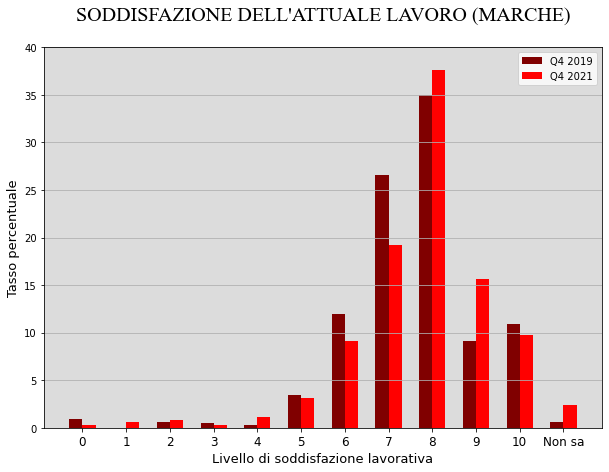

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=12
width=0.3
ind=np.arange(n)




plt.bar(ind, l_sm19_ , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, list_2021_s[2].values(), width, label='Q4 2021',color="red")
plt.xticks(ind+.3/ 2,sod_lab , fontsize=12)

plt.legend()
plt.grid(axis="y")
plt.ylim([0,40])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)

plt.title("SODDISFAZIONE DELL'ATTUALE LAVORO (MARCHE)\n", fontsize=20, fontname='Times New Roman')


ax.set_facecolor("gainsboro")
plt.xlabel("Livello di soddisfazione lavorativa", fontsize=13)
plt.show()
plt.savefig('books_read.jpeg', dpi=400)

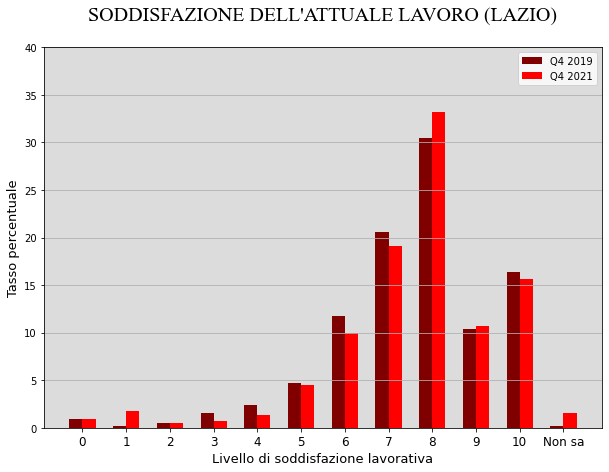

In [67]:
plt.figure(figsize=(10,7))
ax=plt.axes()
n=12
width=0.3
ind=np.arange(n)

plt.bar(ind, list_2019_s[3].values() , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, list_2021_s[3].values(), width, label='Q4 2021',color="red")
plt.xticks(ind+.3/ 2,sod_lab , fontsize=12)

plt.legend()
plt.grid(axis="y")
plt.ylim([0,40])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.xlabel("Livello di soddisfazione lavorativa", fontsize=13)
plt.title("SODDISFAZIONE DELL'ATTUALE LAVORO (LAZIO)\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [68]:
pd.Series(list(list_2019_s[0].values())[:-1]).sum()

98.8125

In [69]:
df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": list(list_2019_s[0].values())[:-1]})

In [70]:
df

,Pesi,Valori
0,0,1.0000
1,1,0.5625
2,2,0.3750
3,3,0.4375
4,4,0.9375
5,5,3.2500
6,6,8.8125
7,7,22.2500
8,8,31.8125
9,9,13.5000


In [71]:
s_avg21=[]
s_avg19=[]
for i in range(4):
    df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": list(list_2021_s[i].values())[:-1]})
    media_pesata=np.average(a=df.Pesi, weights=df.Valori)
    s_avg21.append(media_pesata)
s_avg21

[7.710526315789474, 7.767241379310343, 7.694942903752039, 7.565350877192982]

In [92]:
s_avg19=[]

In [93]:
df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": list(list_2019_s[0].values())[:-1]})
media_pesata=np.average(a=df.Pesi, weights=df.Valori)
s_avg19.append(media_pesata)

In [94]:
df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": list(list_2019_s[1].values())[:-1]})
media_pesata=np.average(a=df.Pesi, weights=df.Valori)
s_avg19.append(media_pesata)

In [95]:
df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": l_sm19_[:-1]})
media_pesata=np.average(a=df.Pesi, weights=df.Valori)
s_avg19.append(media_pesata)

In [91]:
len(list_2019_s[0].values())

12

In [96]:
df=pd.DataFrame.from_dict({"Pesi": range(0,11), "Valori": list(list_2019_s[3].values())[:-1]})
media_pesata=np.average(a=df.Pesi, weights=df.Valori)
s_avg19.append(media_pesata)

In [97]:
s_avg19

[7.752055660974067, 7.696721311475408, 7.546751188589539, 7.553533643673296]

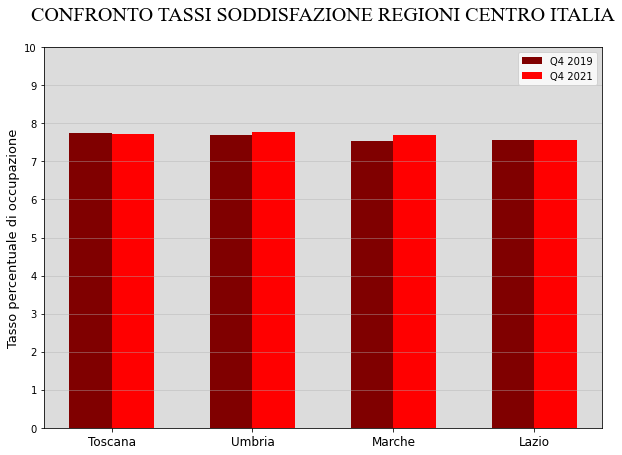

In [100]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, s_avg19 , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, s_avg21, width, label='Q4 2021',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.yticks(range(0,11,1))
plt.grid(axis="y",alpha=0.5)
plt.ylim([0,10])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di occupazione", fontsize=13)
plt.title("CONFRONTO TASSI SODDISFAZIONE REGIONI CENTRO ITALIA\n", fontsize=20, fontname='Times New Roman')

plt.show()

## ANALISI OCCUPAZIONE E DISOCCUPAZIONE

## TASSO OCCUPAZIONE 2019, 2021 (venuto giusto!!)

In [101]:
test = defaultdict(lambda:0)
for i in trim2019["COND3"]:
    test[i]+=1
test #non ci sono valori nulli in COND3

defaultdict(<function __main__.<lambda>()>, {3: 8188, 1: 5207, 2: 479})

In [102]:
def occ(df, reg, anno):
    if anno==2019:
        a=df[df.REG==reg]
        a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
        occ=zip(a.keys(), list(a))
        occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
        occ["Percentage"]=(occ["Totale"]/pd.Series(list(occ["Totale"]))[0:8].sum())*100
        return occ["Percentage"][0]


In [103]:
def occ(df, reg, anno):
    if anno==2019:
        a=df[df.REG==reg]
        a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
        occ=zip(a.keys(), list(a))
        occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
        occ["Percentage"]=(occ["Totale"]/pd.Series(list(occ["Totale"]))[0:8].sum())*100
        return occ["Percentage"][0]
    else:
        a=df[df.REGMCR==reg]
        a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
        occ=zip(a.keys(), list(a))
        occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
        occ["Percentage"]=occ["Totale"]/pd.Series(list(occ["Totale"]))[0:8].sum()*100
        return occ.Percentage[0]

In [104]:
regioni

{9: 'Toscana', 10: 'Umbria', 11: 'Marche', 12: 'Lazio'}

In [105]:
occ_t19=occ(trim2019,9,2019)
occ_u19=occ(trim2019,10,2019)
occ_m19=occ(trim2019,11,2019)
occ_l19=occ(trim2019,12,2019)

occ_t21=occ(trim2021,9,2021)
occ_u21=occ(trim2021,10,2021)
occ_m21=occ(trim2021,11,2021)
occ_l21=occ(trim2021,12,2021)

In [106]:
a=trim2021[trim2021.REGMCR==9]
a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
occ=zip(a.keys(), list(a))
occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
occ["Percentage"]=occ["Totale"]/pd.Series(list(occ["Totale"]))[0:8].sum()*100
occ.Percentage[0]

67.90598290598291

In [107]:
occ_list19=[occ_t19, occ_u19, occ_m19,occ_l19]
occ_list21=[occ_t21, occ_u21, occ_m21,occ_l21]

In [108]:
def charts(l_2019, l_2021):
    fig, ax= plt.subplots(figsize=(15,20),nrows=4, ncols=2, sharey=True)
    for j,i in enumerate(range(9,9+len(l_2019))):
        ax[j,0].grid()
        ax[j,1].grid()
        ax[j,0].bar(l_2019[j].keys(), l_2019[j].values(), color="maroon")
        ax[j,0].set_title(regioni[i]+" 2019", fontsize=14)
        ax[j,1].bar(l_2021[j].keys(), l_2021[j].values(), color="red")
        ax[j,1].set_title(regioni[i]+" 2021", fontsize=14)
        ax[j,0].set_facecolor("gainsboro")
        ax[j,1].set_facecolor("gainsboro")

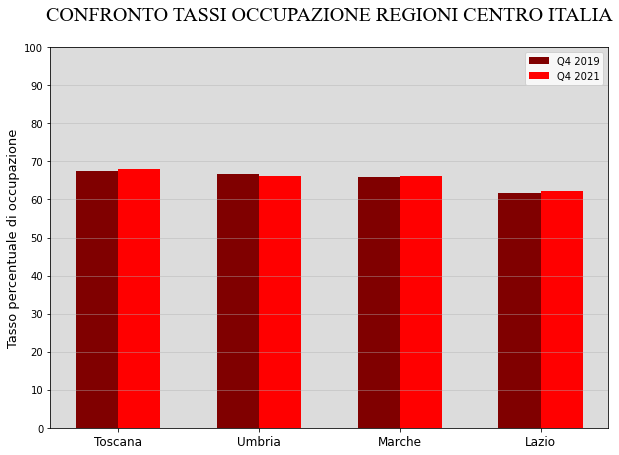

In [109]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, occ_list19 , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, occ_list21, width, label='Q4 2021',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.yticks(range(0,101,10))
plt.grid(axis="y",alpha=0.5)
plt.ylim([0,100])
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di occupazione", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE REGIONI CENTRO ITALIA\n", fontsize=20, fontname='Times New Roman')

plt.show()

### DISOCCUPAZIONE (GIUSTO!!)

In [110]:
def disocc(df, reg, anno):
    if anno==2019:
        a=df[df.REG==reg]
        a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
        occ=zip(a.keys(), list(a))
        occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
        disocc=pd.Series(list(occ.Totale)[1:4]).sum()/pd.Series(list(occ.Totale)[:4]).sum()*100
        return disocc
    else:
        a=df[df.REGMCR==reg]
        a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
        occ=zip(a.keys(), list(a))
        occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
        disocc=pd.Series(list(occ.Totale)[1:4]).sum()/pd.Series(list(occ.Totale)[:4]).sum()*100
        return disocc

In [111]:
dis_t19=disocc(trim2019, 9,2019)
dis_u19=disocc(trim2019, 10,2019)
dis_m19=disocc(trim2019, 11,2019)
dis_l19=disocc(trim2019, 12,2019)

dis_t21=disocc(trim2021, 9,2021)
dis_u21=disocc(trim2021, 10,2021)
dis_m21=disocc(trim2021, 11,2021)
dis_l21=disocc(trim2021, 12,2021)

dis_list19=[dis_t19, dis_u19, dis_m19, dis_l19]
dis_list21=[dis_t21, dis_u21, dis_m21, dis_l21]

In [112]:
dis_list21==occ_list21

False

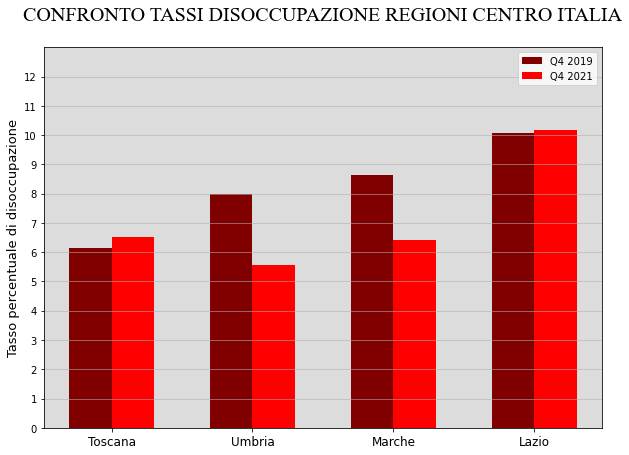

In [113]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, dis_list19 , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, dis_list21, width, label='Q4 2021',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.grid(alpha=0.7, axis="y")
plt.ylim([0,13])
plt.yticks(range(0,13))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di disoccupazione", fontsize=13)
plt.title("CONFRONTO TASSI DISOCCUPAZIONE REGIONI CENTRO ITALIA\n", fontsize=20, fontname='Times New Roman')

plt.show()

### DIVISIONE PER SESSO E TITOLO DI STUDIO
#### OCCUPAZIONE PER SESSO

In [114]:
def occ_s(df, reg, anno):
    if anno==2019:
        a=df[df.REG==reg]
        a=round(a.groupby(by=["COND10", "SG11"])["COEFF"].sum()/10000)
        a=a.unstack(level=0)
        o_m=a.loc[1][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
        o_f=a.loc[2][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
        r_list=[]
        r_list.append(o_m)
        r_list.append(o_f)
        return r_list
    else:
        a=df[df.REGMCR==reg]
        a=round(a.groupby(by=["COND10", "QSF11"])["COEFF"].sum()/10000)
        a=a.unstack(level=0)
        o_m=a.loc[1][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
        o_f=a.loc[2][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
        r_list=[]
        r_list.append(o_m)
        r_list.append(o_f)
        return r_list

In [115]:
occ_t21mf=occ_s(trim2021,9,2021)

In [116]:
occ_19mf=[]
occ_21mf=[]
for i in range(9,13):
    occ_19mf.append(occ_s(trim2019,i,2019))
    occ_21mf.append(occ_s(trim2021,i,2021))

In [117]:
occ_19mf

[[74.34819175777965, 60.218671152228765],
 [74.45255474452554, 60.21897810218978],
 [73.34710743801654, 57.85123966942148],
 [70.35281727224854, 54.291732490784625]]

In [118]:
m19=[]
f19=[]
for i,j in enumerate(occ_19mf):
    m19.append(occ_19mf[i][0])
    f19.append(occ_19mf[i][1])

m21=[]
f21=[]
for i,j in enumerate(occ_21mf):
    m21.append(occ_21mf[i][0])
    f21.append(occ_21mf[i][1])

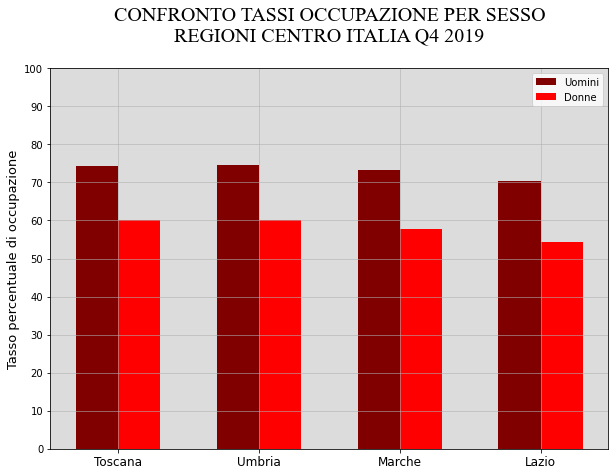

In [119]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, m19 , width, label='Uomini',color="maroon")
plt.bar(ind + width, f19, width, label='Donne',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.grid(alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di occupazione", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER SESSO\nREGIONI CENTRO ITALIA Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

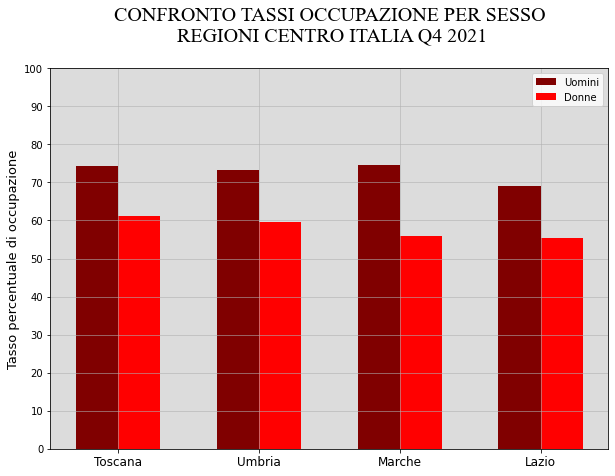

In [120]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, m21 , width, label='Uomini',color="maroon")
plt.bar(ind + width, f21, width, label='Donne',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.grid(alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di occupazione", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER SESSO\n REGIONI CENTRO ITALIA Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()

#### OCCUPAZIONE PER TITOLO DI STUDIO

In [121]:
t_s=["Nessun titolo, licenza elementare o licenza media", "Diploma 2-5 anni", "Laurea"]

In [122]:
a=trim2019[trim2019.REG==9]
a=round(a.groupby(by=["COND10", "EDULEV"])["COEFF"].sum()/10000)
a=a.unstack(level=0)
a=a.drop(" ", axis=0)
a=a.drop([9,10], axis=1)
a=a.fillna(0)

a

COND10,1,2,3,4,5,6,7,8
EDULEV,,,,,,,,
1,19.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0
2,34.0,2.0,0.0,0.0,1.0,0.0,3.0,17.0
3,428.0,26.0,6.0,5.0,13.0,4.0,25.0,281.0
4,91.0,3.0,3.0,0.0,5.0,0.0,3.0,30.0
5,638.0,22.0,20.0,7.0,11.0,9.0,16.0,180.0
6,389.0,2.0,6.0,0.0,4.0,4.0,3.0,47.0


In [123]:
a.iloc[0]=a.iloc[0]+a.iloc[1]+a.iloc[2]

In [124]:
a

COND10,1,2,3,4,5,6,7,8
EDULEV,,,,,,,,
1,481.0,32.0,6.0,5.0,14.0,4.0,28.0,309.0
2,34.0,2.0,0.0,0.0,1.0,0.0,3.0,17.0
3,428.0,26.0,6.0,5.0,13.0,4.0,25.0,281.0
4,91.0,3.0,3.0,0.0,5.0,0.0,3.0,30.0
5,638.0,22.0,20.0,7.0,11.0,9.0,16.0,180.0
6,389.0,2.0,6.0,0.0,4.0,4.0,3.0,47.0


In [125]:
a.iloc[0][1]/(a.iloc[0][::]).sum()*100

54.721274175199085

In [126]:
a.iloc[0][1:4]/(a.iloc[0][:4]).sum()*100

COND10
2    6.106870
3    1.145038
4    0.954198
Name: 1, dtype: float64

In [127]:
a.iloc[5][0:1]/a.iloc[5][::].sum()

COND10
1    0.854945
Name: 6, dtype: float64

In [128]:
1-(a.iloc[5][1:4].sum()/a.iloc[5][:4].sum()+a.iloc[5][0:1]/a.iloc[5][::].sum())

COND10
1    0.124904
Name: 6, dtype: float64

In [129]:
a.iloc[5]

COND10
1    389.0
2      2.0
3      6.0
4      0.0
5      4.0
6      4.0
7      3.0
8     47.0
Name: 6, dtype: float64

In [130]:
def occ_ts(df, reg, anno):
    laurea=[]
    diploma=[]
    nots=[]
    ret_list=[]
    if anno==2019:
        a=df[df.REG==reg]
        a=round(a.groupby(by=["COND10", "EDULEV"])["COEFF"].sum()/10000)
        a=a.unstack(level=0)
        a=a.drop(" ", axis=0)
        a=a.drop([9,10], axis=1)
        a=a.fillna(0)
        a.iloc[0]=a.iloc[0]+a.iloc[1]+a.iloc[2] #nessun titolo, scuola elementare, scuola media
        a.iloc[3]=a.iloc[3]+a.iloc[4] #diploma di scuola superiore
        nots.append((a.iloc[0][1]/(a.iloc[0][::]).sum())*100)
        diploma.append((a.iloc[3][1]/(a.iloc[3][::]).sum())*100)
        laurea.append((a.iloc[5][1]/(a.iloc[5][::]).sum())*100)
        nots.append(((a.iloc[0][1:4]).sum()/(a.iloc[0][:4]).sum())*100)
        diploma.append(((a.iloc[3][1:4]).sum()/(a.iloc[3][:4]).sum())*100)
        laurea.append(((a.iloc[5][1:4]).sum()/(a.iloc[5][:4]).sum())*100)
        nots.append(100-nots[0]-nots[1])
        diploma.append(100-diploma[0]-diploma[1])
        laurea.append(100-laurea[0]-laurea[1])
        ret_list.append(nots)
        ret_list.append(diploma)
        ret_list.append(laurea)
        return ret_list
    else:
        a=df[df.REGMCR==reg]
        a=round(a.groupby(by=["COND10", "EDULEV"])["COEFF"].sum()/10000)
        a=a.unstack(level=0)
        a=a.drop(" ", axis=0)
        a=a.drop([9,10], axis=1)
        a=a.fillna(0)
        a.iloc[0]=a.iloc[0]+a.iloc[1]+a.iloc[2] #nessun titolo, scuola elementare, scuola media
        a.iloc[3]=a.iloc[3]+a.iloc[4] #diploma di scuola superiore
        nots.append((a.iloc[0][1]/(a.iloc[0][::]).sum())*100)
        diploma.append((a.iloc[3][1]/(a.iloc[3][::]).sum())*100)
        laurea.append((a.iloc[5][1]/(a.iloc[5][::]).sum())*100)
        nots.append(((a.iloc[0][1:4]).sum()/(a.iloc[0][:4]).sum())*100)
        diploma.append(((a.iloc[3][1:4]).sum()/(a.iloc[3][:4]).sum())*100)
        laurea.append(((a.iloc[5][1:4]).sum()/(a.iloc[5][:4]).sum())*100)
        nots.append(100-nots[0]-nots[1])
        diploma.append(100-diploma[0]-diploma[1])
        laurea.append(100-laurea[0]-laurea[1])
        ret_list.append(nots)
        ret_list.append(diploma)
        ret_list.append(laurea)
        return ret_list

In [131]:
ts_tosc19=occ_ts(trim2019, 9, 2019)

In [132]:
ts_tosc19

[[54.721274175199085, 8.206106870229007, 37.07261895457191],
 [70.23121387283237, 7.015306122448979, 22.75348000471865],
 [85.49450549450549, 2.0151133501259446, 12.490381155368567]]

In [133]:
ts19=[]
ts21=[]
for i in range(9,13):
    ts19.append(occ_ts(trim2019, i, 2019))
    ts21.append(occ_ts(trim2021, i, 2021))

In [134]:
ts19

[[[54.721274175199085, 8.206106870229007, 37.07261895457191],
  [70.23121387283237, 7.015306122448979, 22.75348000471865],
  [85.49450549450549, 2.0151133501259446, 12.490381155368567]],
 [[50.29940119760479, 7.6923076923076925, 42.00829111008752],
  [71.21771217712177, 8.962264150943396, 19.820023671934834],
  [83.63636363636363, 5.154639175257731, 11.208997188378643]],
 [[55.0561797752809, 8.837209302325581, 36.106610922393514],
  [69.30232558139535, 9.422492401215806, 21.275182017388843],
  [78.57142857142857, 7.142857142857142, 14.285714285714288]],
 [[49.680511182108624, 10.503597122302159, 39.815891695589215],
  [60.78078078078079, 12.45674740484429, 26.762471814374923],
  [80.21857923497268, 6.017925736235595, 13.763495028791725]]]

In [135]:
pd.Series(ts19[0][0]).sum()

100.0

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2095876151.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])


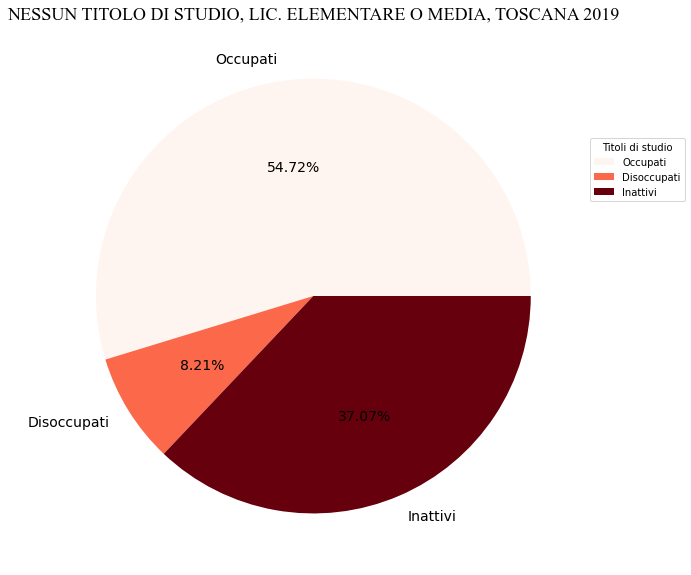

In [136]:
ax=pd.Series(ts19[0][0]).plot.pie(figsize=(10,10), cmap="Reds", fontsize=14,labels=["Occupati", "Disoccupati", "Inattivi"], autopct="%1.2f%%")

ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])
ax.set_ylabel('')
ax.set_title("NESSUN TITOLO DI STUDIO, LIC. ELEMENTARE O MEDIA, TOSCANA 2019", fontsize=18, fontname='Times New Roman')
plt.show()

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\2278196538.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])


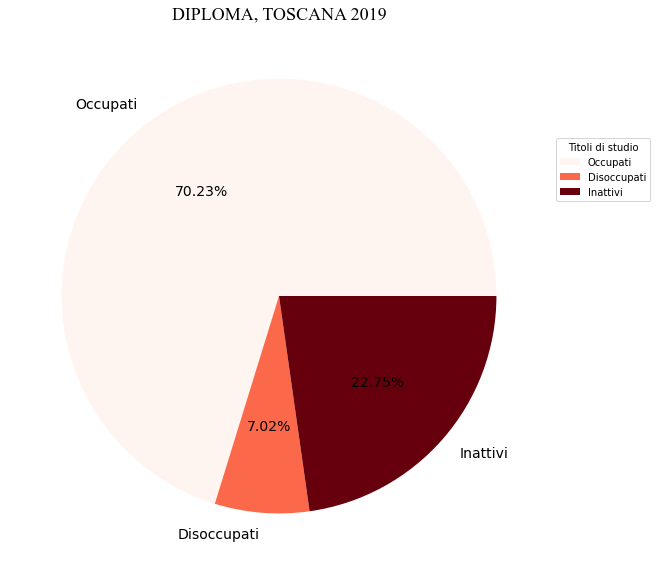

In [137]:
ax=pd.Series(ts19[0][1]).plot.pie(figsize=(10,10), cmap="Reds", fontsize=14,labels=["Occupati", "Disoccupati", "Inattivi"], autopct="%1.2f%%")

ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])
ax.set_ylabel('')
ax.set_title("DIPLOMA, TOSCANA 2019", fontsize=18, fontname='Times New Roman')
plt.show()

C:\Users\gugli\AppData\Local\Temp\ipykernel_748\3171177868.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])


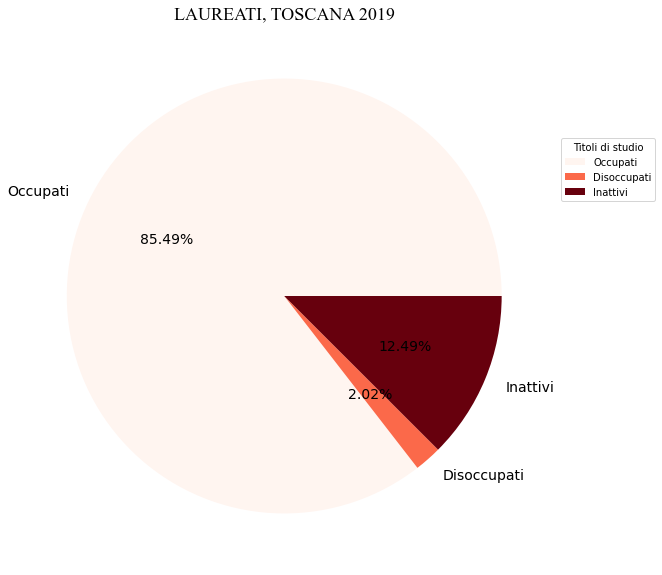

In [138]:
ax=pd.Series(ts19[0][2]).plot.pie(figsize=(10,10), cmap="Reds", fontsize=14,labels=["Occupati", "Disoccupati", "Inattivi"], autopct="%1.2f%%")

ax.legend(t_s, title="Titoli di studio",bbox_to_anchor=(1, .8), labels=["Occupati", "Disoccupati", "Inattivi"])
ax.set_ylabel('')
ax.set_title("LAUREATI, TOSCANA 2019", fontsize=18, fontname='Times New Roman')
plt.show()

In [139]:
ts19

[[[54.721274175199085, 8.206106870229007, 37.07261895457191],
  [70.23121387283237, 7.015306122448979, 22.75348000471865],
  [85.49450549450549, 2.0151133501259446, 12.490381155368567]],
 [[50.29940119760479, 7.6923076923076925, 42.00829111008752],
  [71.21771217712177, 8.962264150943396, 19.820023671934834],
  [83.63636363636363, 5.154639175257731, 11.208997188378643]],
 [[55.0561797752809, 8.837209302325581, 36.106610922393514],
  [69.30232558139535, 9.422492401215806, 21.275182017388843],
  [78.57142857142857, 7.142857142857142, 14.285714285714288]],
 [[49.680511182108624, 10.503597122302159, 39.815891695589215],
  [60.78078078078079, 12.45674740484429, 26.762471814374923],
  [80.21857923497268, 6.017925736235595, 13.763495028791725]]]

In [140]:
[ts19[0][0][1],ts19[0][1][1],ts19[0][2][1]]

[8.206106870229007, 7.015306122448979, 2.0151133501259446]

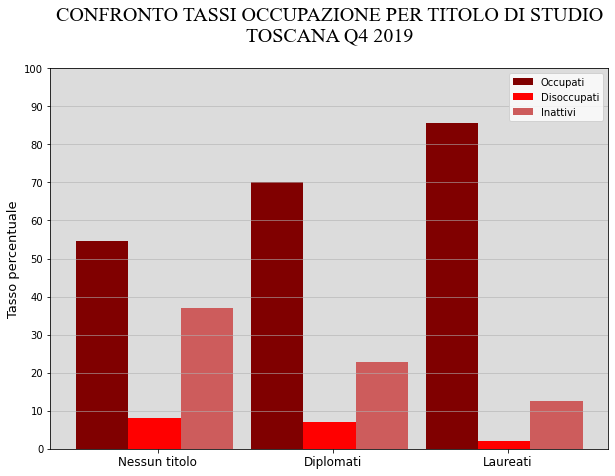

In [141]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts19[0][0][0],ts19[0][1][0],ts19[0][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts19[0][0][1],ts19[0][1][1],ts19[0][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts19[0][0][2],ts19[0][1][2],ts19[0][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nTOSCANA Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

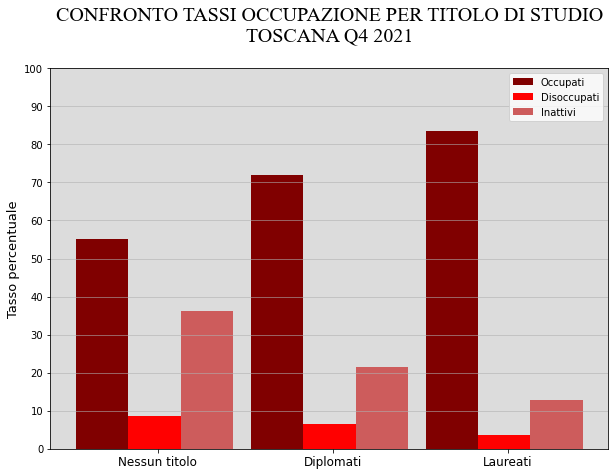

In [142]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts21[0][0][0],ts21[0][1][0],ts21[0][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts21[0][0][1],ts21[0][1][1],ts21[0][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts21[0][0][2],ts21[0][1][2],ts21[0][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nTOSCANA Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()

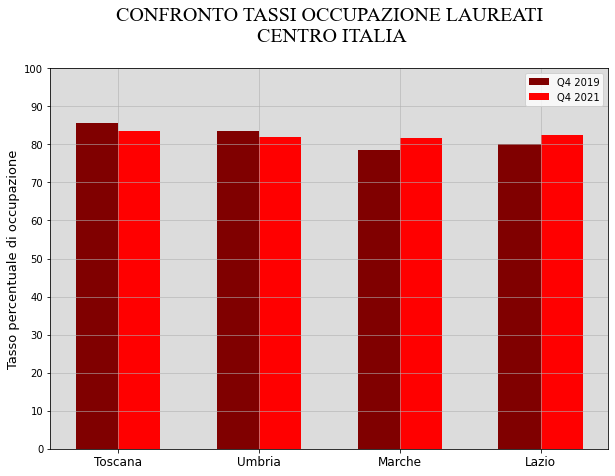

In [143]:
plt.figure(figsize=(10,7))
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts19[0][2][0],ts19[1][2][0],ts19[2][2][0],ts19[3][2][0]] , width, label='Q4 2019',color="maroon")
plt.bar(ind + width, [ts21[0][2][0],ts21[1][2][0],ts21[2][2][0],ts21[3][2][0]], width, label='Q4 2021',color="red")
plt.xticks(ind + width / 2, (regioni.values()), fontsize=12)
plt.legend()
plt.grid(alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale di occupazione", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE LAUREATI\n CENTRO ITALIA\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [144]:
regioni

{9: 'Toscana', 10: 'Umbria', 11: 'Marche', 12: 'Lazio'}

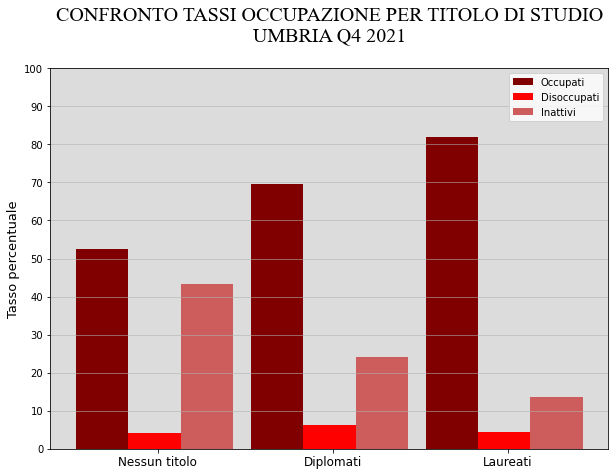

In [145]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts21[1][0][0],ts21[1][1][0],ts21[1][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts21[1][0][1],ts21[1][1][1],ts21[1][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts21[1][0][2],ts21[1][1][2],ts21[1][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nUMBRIA Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()

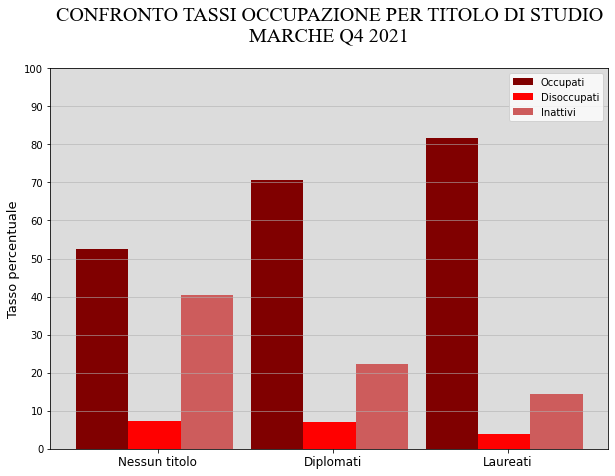

In [146]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts21[2][0][0],ts21[2][1][0],ts21[2][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts21[2][0][1],ts21[2][1][1],ts21[2][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts21[2][0][2],ts21[2][1][2],ts21[2][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nMARCHE Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()

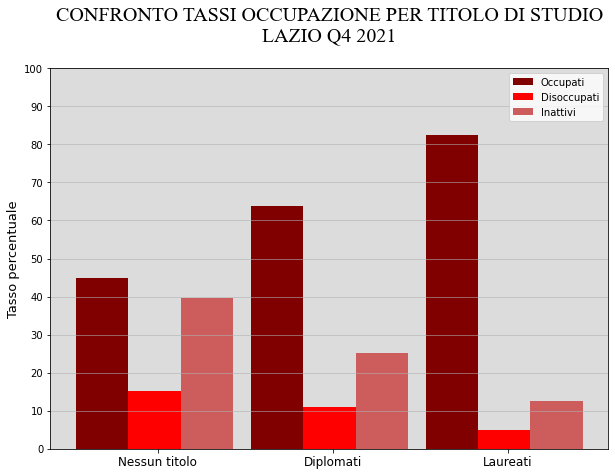

In [147]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts21[3][0][0],ts21[3][1][0],ts21[3][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts21[3][0][1],ts21[3][1][1],ts21[3][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts21[3][0][2],ts21[3][1][2],ts21[3][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nLAZIO Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()

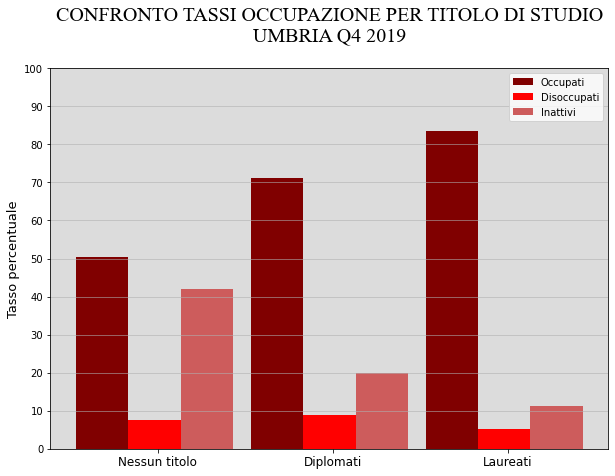

In [148]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts19[1][0][0],ts19[1][1][0],ts19[1][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts19[1][0][1],ts19[1][1][1],ts19[1][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts19[1][0][2],ts19[1][1][2],ts19[1][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nUMBRIA Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

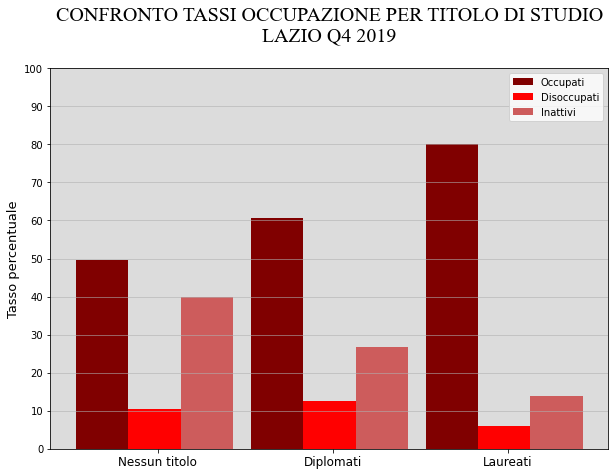

In [149]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts19[3][0][0],ts19[3][1][0],ts19[3][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts19[3][0][1],ts19[3][1][1],ts19[3][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts19[3][0][2],ts19[3][1][2],ts19[3][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nLAZIO Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

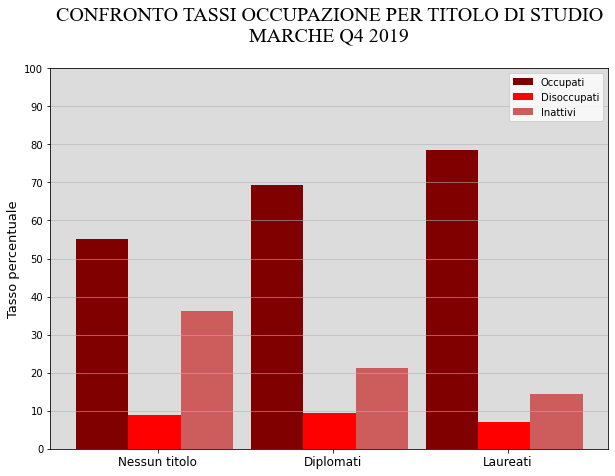

In [150]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, [ts19[2][0][0],ts19[2][1][0],ts19[2][2][0]] , width, label='Occupati',color="maroon")
plt.bar(ind + width, [ts19[2][0][1],ts19[2][1][1],ts19[2][2][1]], width, label='Disoccupati',color="red")
plt.bar(ind + width+.3, [ts19[2][0][2],ts19[2][1][2],ts19[2][2][2]], width, label='Inattivi',color="indianred")
plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nMARCHE Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

In [151]:
ts19

[[[54.721274175199085, 8.206106870229007, 37.07261895457191],
  [70.23121387283237, 7.015306122448979, 22.75348000471865],
  [85.49450549450549, 2.0151133501259446, 12.490381155368567]],
 [[50.29940119760479, 7.6923076923076925, 42.00829111008752],
  [71.21771217712177, 8.962264150943396, 19.820023671934834],
  [83.63636363636363, 5.154639175257731, 11.208997188378643]],
 [[55.0561797752809, 8.837209302325581, 36.106610922393514],
  [69.30232558139535, 9.422492401215806, 21.275182017388843],
  [78.57142857142857, 7.142857142857142, 14.285714285714288]],
 [[49.680511182108624, 10.503597122302159, 39.815891695589215],
  [60.78078078078079, 12.45674740484429, 26.762471814374923],
  [80.21857923497268, 6.017925736235595, 13.763495028791725]]]

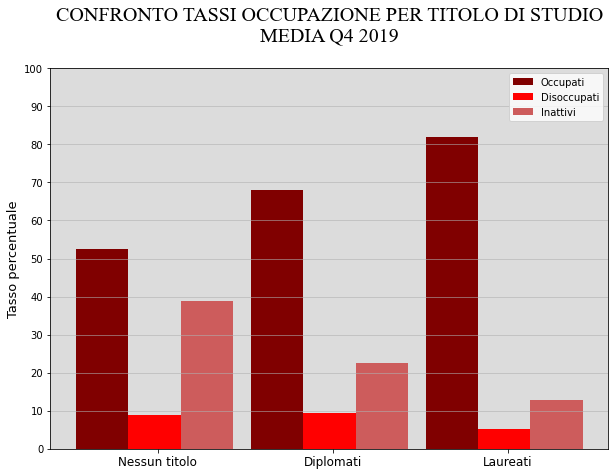

In [152]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()

#OCCUPATI
plt.bar(ind, [(ts19[3][0][0]+ts19[2][0][0]+ts19[1][0][0]+ts19[0][0][0])/4
              ,(ts19[3][1][0]+ts19[2][1][0]+ts19[1][1][0]+ts19[0][1][0])/4
              ,(ts19[3][2][0]+ts19[2][2][0]+ts19[1][2][0]+ts19[0][2][0])/4] , width, label='Occupati',color="maroon")


#DISOCCUPATI
plt.bar(ind + width, [(ts19[3][0][1]+ts19[2][0][1]+ts19[1][0][1]+ts19[0][0][1])/4
              ,(ts19[3][1][1]+ts19[2][1][1]+ts19[1][1][1]+ts19[0][1][1])/4
              ,(ts19[3][2][1]+ts19[2][2][1]+ts19[1][2][1]+ts19[0][2][1])/4], width, label='Disoccupati',color="red")

#inattivi
plt.bar(ind + width+.3, [(ts19[3][0][2]+ts19[2][0][2]+ts19[1][0][2]+ts19[0][0][2])/4
              ,(ts19[3][1][2]+ts19[2][1][2]+ts19[1][1][2]+ts19[0][1][2])/4
              ,(ts19[3][2][2]+ts19[2][2][2]+ts19[1][2][2]+ts19[0][2][2])/4], width, label='Inattivi',color="indianred")



plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nMEDIA Q4 2019\n", fontsize=20, fontname='Times New Roman')

plt.show()

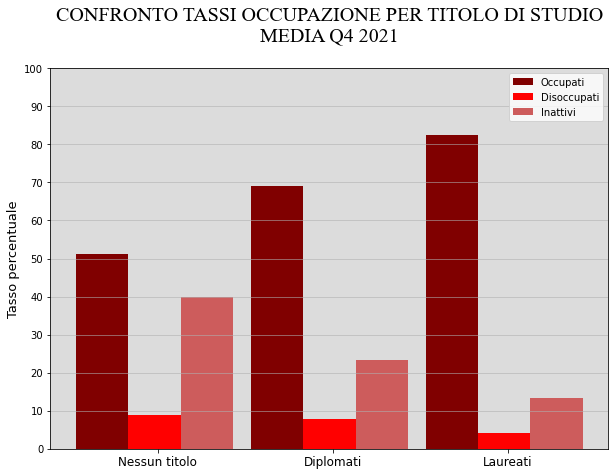

In [153]:
plt.figure(figsize=(10,7))
n=3
width=0.3
ind=np.arange(n)
ax=plt.axes()

#OCCUPATI
plt.bar(ind, [(ts21[3][0][0]+ts21[2][0][0]+ts21[1][0][0]+ts21[0][0][0])/4
              ,(ts21[3][1][0]+ts21[2][1][0]+ts21[1][1][0]+ts21[0][1][0])/4
              ,(ts21[3][2][0]+ts21[2][2][0]+ts21[1][2][0]+ts21[0][2][0])/4] , width, label='Occupati',color="maroon")


#DISOCCUPATI
plt.bar(ind + width, [(ts21[3][0][1]+ts21[2][0][1]+ts21[1][0][1]+ts21[0][0][1])/4
              ,(ts21[3][1][1]+ts21[2][1][1]+ts21[1][1][1]+ts21[0][1][1])/4
              ,(ts21[3][2][1]+ts21[2][2][1]+ts21[1][2][1]+ts21[0][2][1])/4], width, label='Disoccupati',color="red")

#inattivi
plt.bar(ind + width+.3, [(ts21[3][0][2]+ts21[2][0][2]+ts21[1][0][2]+ts21[0][0][2])/4
              ,(ts21[3][1][2]+ts21[2][1][2]+ts21[1][1][2]+ts21[0][1][2])/4
              ,(ts21[3][2][2]+ts21[2][2][2]+ts21[1][2][2]+ts21[0][2][2])/4], width, label='Inattivi',color="indianred")



plt.xticks(ind + width+.3 / 15, ["Nessun titolo", "Diplomati", "Laureati"], fontsize=12)
plt.legend()
plt.grid(axis="y",alpha=0.7)
plt.ylim([0,100])
plt.yticks(range(0,101,10))
ax.set_facecolor("gainsboro")
plt.ylabel("Tasso percentuale", fontsize=13)
plt.title("CONFRONTO TASSI OCCUPAZIONE PER TITOLO DI STUDIO\nMEDIA Q4 2021\n", fontsize=20, fontname='Times New Roman')

plt.show()